# Malarial Cell Image Classification

## Introduction

Malaria is a highly contagious disease, most human cases of malaria are transmitted by female Anopheles mosquito bites, it could be left ignored or untreated at beginning stages. So, it becomes challenging to diagnose. (World Health Organization,2023). So, early detection and cure of Malaria is the most important aspect to keep human community healthy. The traditional lab-based process is too time consuming and resource intensive. So, there is a need for new Automated Malaria Detection. In this study, with the help of Machine learning and Deep Learning techniques we tried developing Classification models, which are trained with parasited and Unparasited cell images in the Dataset. First, we started by examining the data and looking at differences between these then read all these images by using Open CV then added labels to these to differentiate between them then combining them. Using these models, we tried to obtain best performing model which can detect Infected and Uninfected cell and with high accuracy. So, this will help in fast diagnosis of the disease.

## Importing necessary Libraries

In [1]:
# In our machine learning project, we have used many libraries to help us in different stages of our analysis like data processing, model building, and evaluation.
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,average_precision_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from kerastuner import HyperParameters, RandomSearch
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import BayesianOptimization

C:\Users\ferra\AppData\Local\Temp\ipykernel_16680\1726264525.py:15: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperParameters, RandomSearch


## Exploration of the Dataset

### Reading the Data 

In [2]:
# Here we are defining and  setting the path directories where images are stored locally  
parasitedDir = r'C:\Users\ferra\ML1\cell_images\Parasitized'
uninfectedDir = r'C:\Users\ferra\ML1\cell_images\Uninfected'

Creating empty Lists to store the images read

In [3]:
# Initializing empty lists to store images
parasitedImgs = []
uninfectedImgs = []

In [4]:
# we have created a function to load the images from directories , for which we have iterated through all the images in the directory and by using OpenCV's cv2 we have loaded the image and added image to the list specified.
# function to load images from  directory 
def loadImages(directory):
    imgs = []
    
    for img in os.listdir(directory):
        imagePath = os.path.join(directory, img)
        
        #loading image using cv2
        image = cv2.imread(imagePath)
        
        #add image to list
        imgs.append(image)
      
    return imgs

#load parasited and uninfected images
parasitedImgs = loadImages(parasitedDir)
uninfectedImgs = loadImages(uninfectedDir)

print(f"Number of parasited images read: {len(parasitedImgs)}")
print(f"Number of uninfected images read: {len(uninfectedImgs)}")

Number of parasited images read: 13780
Number of uninfected images read: 13780


### Data Distribution Analysis

Now visually we can represent the distribution of data by using pie chart. we can observe that input data has 50% of parasited and 50% of Uninfected Images 

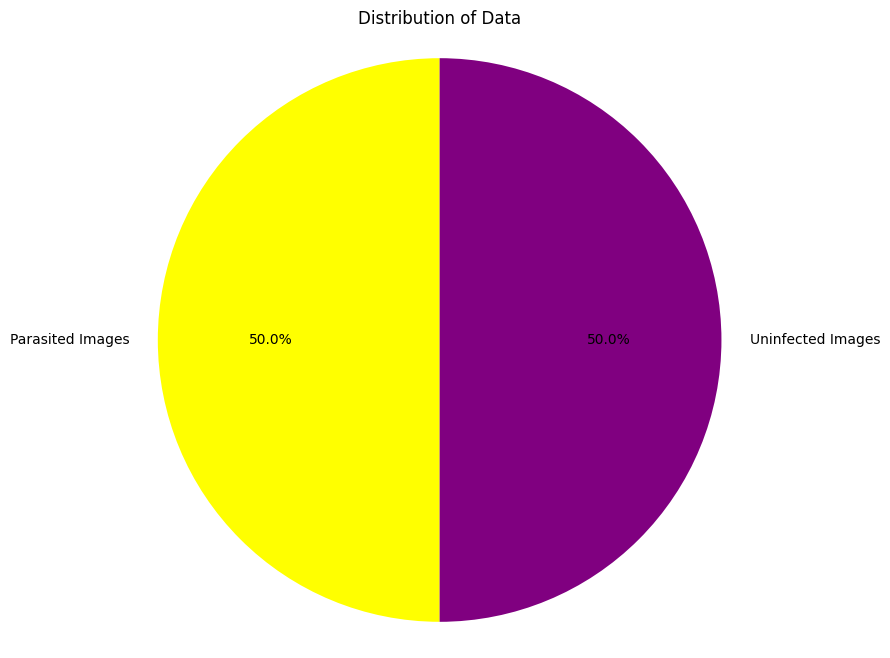

In [5]:
num_parasited = len(parasitedImgs)
num_uninfected = len(uninfectedImgs)

plt.figure(figsize=(8, 8))
plt.pie([num_parasited, num_uninfected], labels=['Parasited Images', 'Uninfected Images'],autopct='%1.1f%%', colors=['yellow', 'purple'], startangle=90)
plt.axis('equal') 
plt.title('Distribution of Data')
plt.show()

### Visual Analysis

After the data is loaded we can take a look at the images in each category and try to observe the differences between these parasited and uninfected Images . For this we have defined a function to display first 10 images in both these types and used a for loop in this to iterate through images and to display these images we have used Matplotlib's pyplot.We can Observe from these images that in Malarial parasited cell images there are some purple coloured objects which may be the infectants or parasite present in blood cells and in uninfected images this is not present this will be our distinguishing factor for our models to classify these images as Infected or Uninfected .

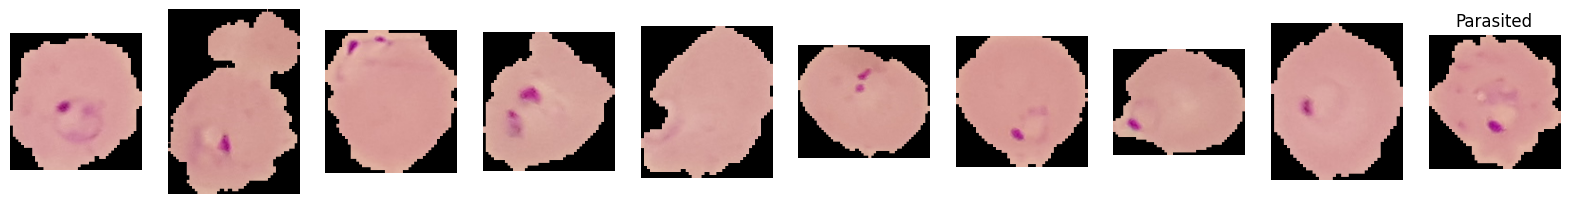

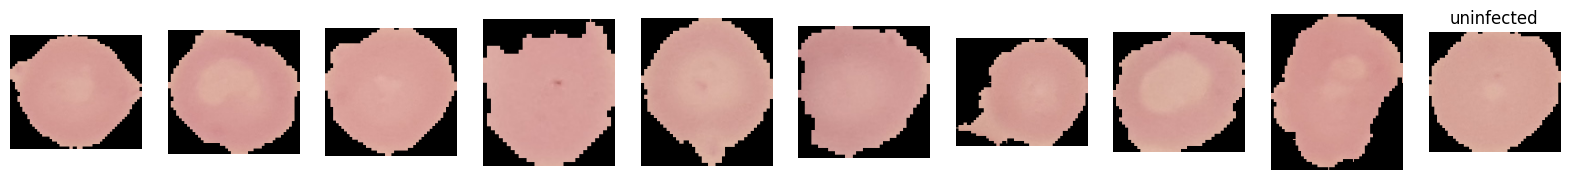

In [6]:

def displayImages(imgs,title=''):
    
    fig = plt.figure(figsize=(20,20))
    
    for i in range(10):
        a = fig.add_subplot(1,10,i+1)
         # openCV reads imgs in BGR so convert to RGB to display in a nicer way
        a.imshow(cv2.cvtColor(imgs[i],cv2.COLOR_BGR2RGB))
        a.axis('off')
    plt.title(title)    
    plt.show()
  
# display first 10 images 
displayImages(parasitedImgs,title = 'Parasited')
displayImages(uninfectedImgs,title='uninfected')

## Data Preprocessing

### Grayscaling of Images

The process of transforming an image to shades of gray from other color spaces, such as for example RGB, is known as Grayscaling. This process is Important because it reduces the dimensional space to a single channel and for images that are in different color spaces like RGB has 3 different channels. In order to improve the processing of image information, color images are converted to grayscale via a method called image grayscaling. Through the use of a certain algorithm, each pixel's gray value which indicates its luminance is obtained. From the red, green, and blue channel values in this procedure (Fairchild, 2013). So, this helps us by simplifying image processing and lowering computational and storage requirements (Cadik, 2008; Benedetti et al., 2012; Fairchild, 2013).



In [7]:
# The code below  uses a function toGreyScale() which takes the image input and we iterate the images through a for loop
#function to convert all images to greyscale
def toGreyScale(images):
    greyImgs = []
    for img in images:
        if img is None:
            print("Error loading an image")
            continue
        greyImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        greyImgs.append(greyImg)
     
    return greyImgs

#parasited  and uninfected BGR images to greyscale
parasitedGreyImgs = toGreyScale(parasitedImgs)
uninfectedGreyImgs = toGreyScale(uninfectedImgs)
print(f"Number of parasited images read: {len(parasitedGreyImgs)}")
print(f"Number of uninfected images read: {len(uninfectedGreyImgs)}")


Error loading an image
Error loading an image
Number of parasited images read: 13779
Number of uninfected images read: 13779


Now taking a look at the Grayscaled images by using the same displayImages() function defined above ,by passing these Grayscaled images lists. We can observe that  our images are Grayscaled and also we can observe that the distinguishing charecters that are spots in the parasited images observed before are not lost after this conversion as well. So, we can say that even after this preprocess our data has not lost its charecterstics. So. we can continue further with our analysis using these images.

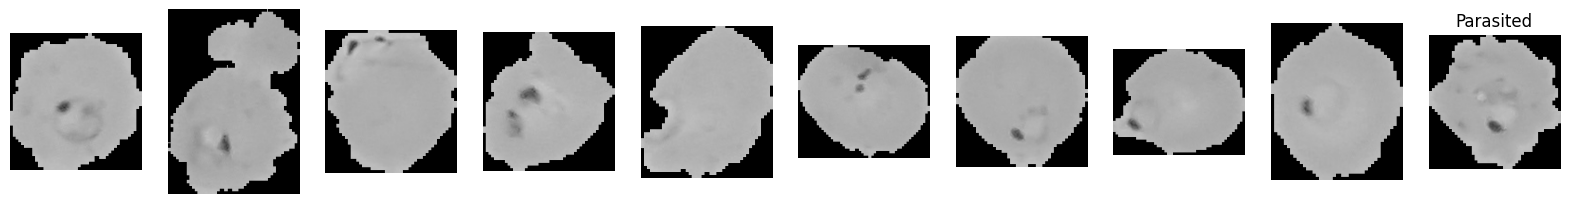

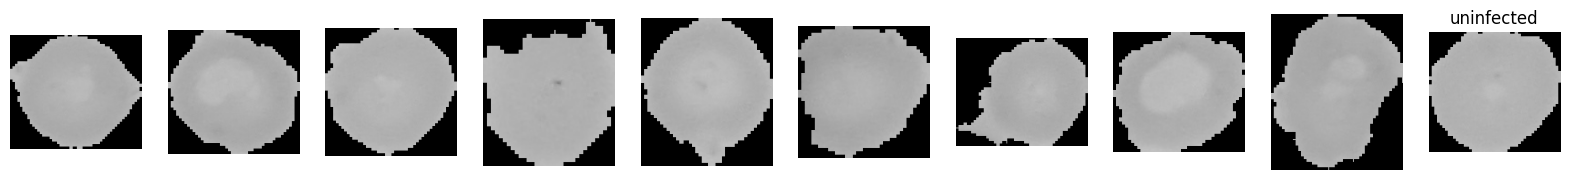

In [8]:
# display first 10 images 
displayImages(parasitedGreyImgs,title = 'Parasited')
displayImages(uninfectedGreyImgs,title='uninfected')

### Resizing of Images

This is a critical preprocessing step that makes the input data compatible with the fixed input size required by models by resizing images to a consistent size. It makes every image the same size, scale and avoids problems that could occur from different image sizes during the training.Here we have used cv2's resize function to set the input image size to this desired size and have iterated both the parasited and uninfected images using for loop and resized the images to constant required size. Then we have displayed the resized Image. 

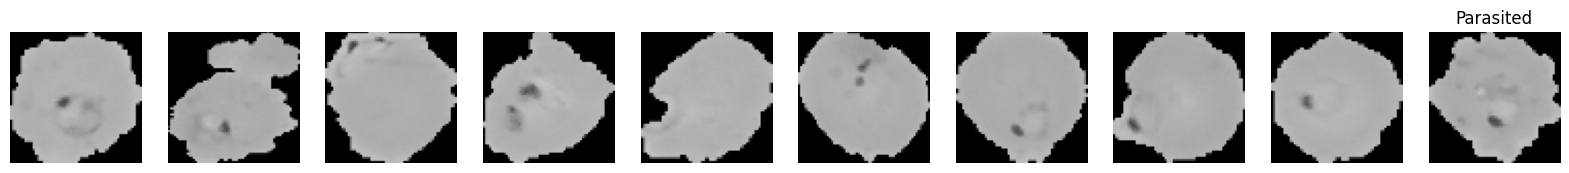

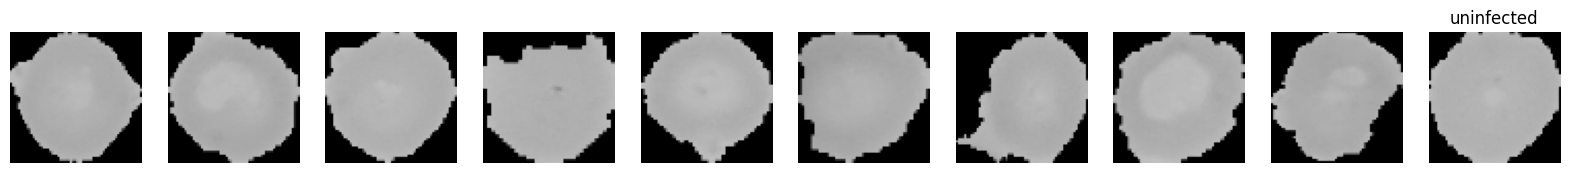

In [9]:
# # Resize images
parasitedImgs = [cv2.resize(img, (64, 64)) for img in parasitedGreyImgs]
uninfectedImgs = [cv2.resize(img, (64, 64)) for img in uninfectedGreyImgs]
# display first 10 images 
displayImages(parasitedImgs,title = 'Parasited')
displayImages(uninfectedImgs,title='uninfected')

### Normalization of pixel values

The process of bringing an image's pixel values into a common range is called normalization. The process involves dividing every pixel value by the highest value that may be achieved. Using np.array(), the code first transforms the lists of parasitedImgs and uninfectedImgs into NumPy arrays. Because NumPy arrays enable effective numerical operations on the data, this step is required.Next, each image's pixel values within the arrays are divided by 255.0. The pixel values are scaled to fall between 0 and 1 during this normalizing procedureThis helps in faster convergence during the training process for models.



In [10]:
# Normalize pixel values
parasitedImgs = np.array(parasitedImgs) / 255.0
uninfectedImgs = np.array(uninfectedImgs) / 255.0

In [11]:
print(f"Number of parasited images read: {len(parasitedImgs)}")
print(f"Number of uninfected images read: {len(uninfectedImgs)}")


Number of parasited images read: 13779
Number of uninfected images read: 13779


### Label Creation

In [12]:
# This is an important step in preparing the data for training a machine learning model, mainly for supervised learning tasks like image classification
# creating labels
#assign label 1 to all parasited images
parasitedLabels = np.array([1]*len(parasitedImgs))

#assign label 0 to all uninfected images
uninfectedLabels = np.array([0]*len(uninfectedImgs))

#combine labels
labels = np.concatenate((parasitedLabels,uninfectedLabels))
print(len(labels))

#combine images
images = np.concatenate((parasitedImgs,uninfectedImgs))
print(len(images))


27558
27558


### Data Prepration 

In the code below we first print the original shape of the images array, then reshape it from 3D   to a 2D format by flattening each image into a 1D vector. This reshaping prepares the image data for input into our Machine learning models below.

In [13]:
print(images.shape)

(27558, 64, 64)


In [14]:
images = images.reshape(images.shape[0], -1)

In [15]:
print(images.shape)

(27558, 4096)


### Splitting data to Training and test set

The code below splits the dataset into training and testing sets. It assigns 80% of the data to X_train and y_train for training set in random, and 20% to X_test and y_test for testing in random. The test_size=0.2 parameter specifies to set 20% test set size, and random_state=42 helps us in reproducibility. This split allows us to evaluate the model's performance on unseen data and here X_train and X_test has image data and y_train and y_test has its corresponding label data.



In [16]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## Supervised Machine Learning Models

### Logistic Regression

Cokluk (2010) defines logistic regression as a statistical analysis technique used to determine the combination of independent variables that best explain the membership in certain groups, called the dichotomous dependent variable. The paper states that the goal of logistic regression is the classification of individuals into different groups.Lines of code below are used to train a logistic regression model using the scikit-learn library in Python. First, we Create an instance of the LogisticRegression class with the max_iter parameter set to 10000, which specifies the maximum number of iterations for the algorithm to converge. 


In [17]:
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

#### Logistic Regression Evaluation

Now we make predictions on the test set using predict function. Then we calculate the Accuracy , Precision , Recall , F1 score using sklearn.metrics methods by passing test set and predicted result. Looking at the results we can see moderate results like 63% of accuracy on predictions  and around same values in all other evaluation metrics.

In [18]:
# Evaluate the model on the test set
log_y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, log_y_pred)
precision = precision_score(y_test, log_y_pred)
recall = recall_score(y_test, log_y_pred)
f1 = f1_score(y_test, log_y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.63
Precision: 0.64
Recall: 0.62
F1-score: 0.63


we can plot confusion matrix to see the performance ,and see how many TP ,TN , FP,FN values are obtained while model predicting on the testset

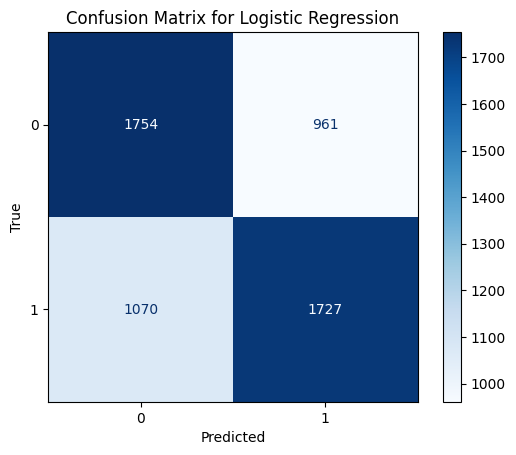

In [19]:
conf_mat = confusion_matrix(y_test, log_y_pred)
disp = ConfusionMatrixDisplay(conf_mat, display_labels=lr_model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

We calculate the false positive rates and true positive rates then AUC using that .Then plot the Receiver Operating Chrecteristic Curve ,with AUC 0.63 which shows the performance of a classification model at all classification thresholds by plotting True Positive Rate and False Positive rate. This again suggests a moderate model performance in Classification.

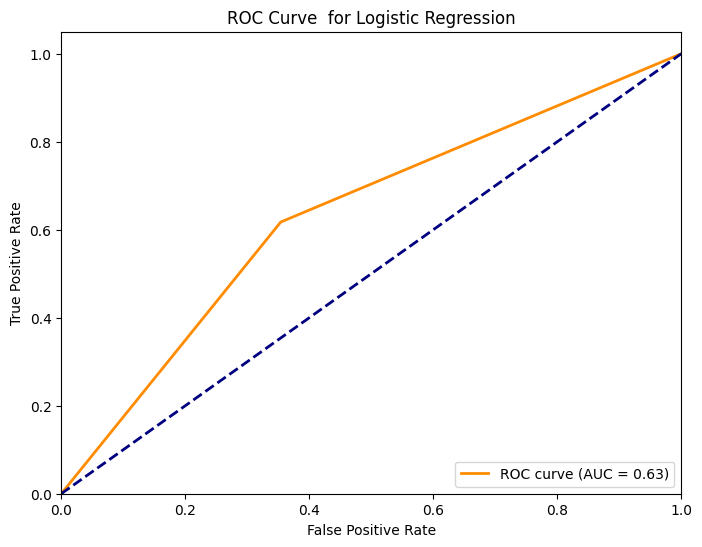

In [20]:
# Calculating ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, log_y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve  for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


code below calculates and plots the Precision Recall curve and the Average Precision  score first we calculate precision and recall from scikit learn's precision_recall_curve function by passing true labels and predicted labels then calculate average precision score value which is 0.59, thus model demonstrates moderate performance in retrieving positive instances.


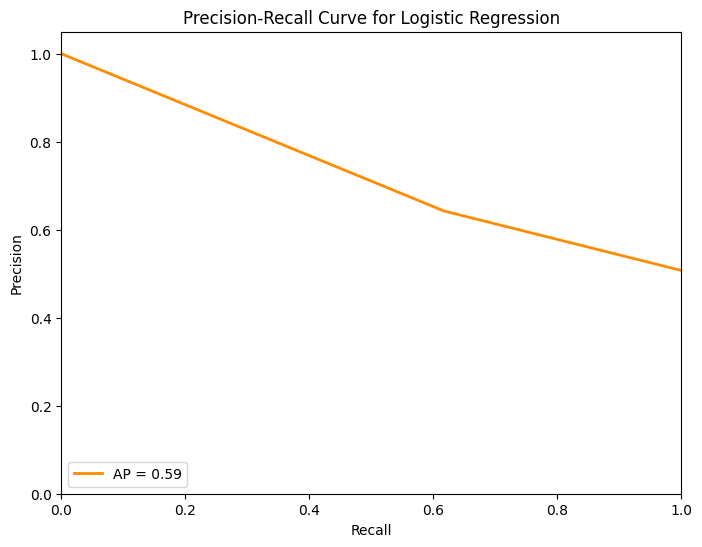

In [21]:
# Calculate Precision-Recall curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, log_y_pred)
ap = average_precision_score(y_test, log_y_pred)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='AP = %0.2f' % ap)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc="lower left")
plt.show()

### Support Vector Machines

SVM is a supervised machine learning model which uses a hyperplane that optimizes the separation margin between the data of the two classes, the SVM classification method splits the data samples of the two classes. Further by applying the kernel functions we can improve the accuracy of predictions as well (Qi and Wen, 2017). As we have a binary classification task we are using SVM here and have created a instance of svm model by getting it from SVC then we have fitted the model with training data.

In [22]:
# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)




SVC()

#### SVM Evaluation

We have made predictions on the test set and calculated accuracy precision recall F1score as we have done above and we can observe good results here with 0.72 accuracy ,precison.F1 score and recall value of 0.73, Thus SVM provided good results on the test set but one obsevation is SVM is computationallly very intensive and also consumed lot of time to execute.

In [23]:
# Evaluate the model on the test set
svm_y_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)

print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1-score: {svm_f1:.2f}")


Accuracy: 0.72
Precision: 0.72
Recall: 0.73
F1-score: 0.72


We can observe that this model performed better than logistic regression when comparision of confusion matrix results

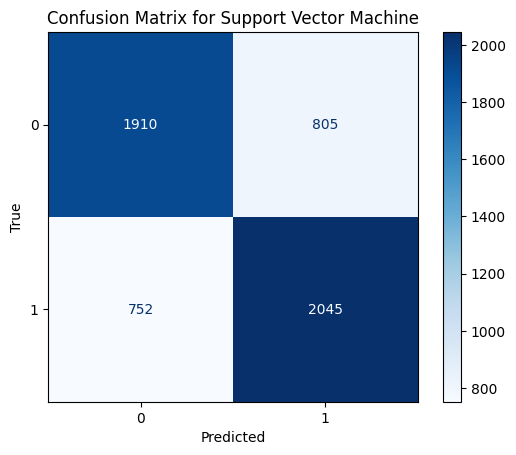

In [24]:
conf_mat = confusion_matrix(y_test, svm_y_pred)
disp = ConfusionMatrixDisplay(conf_mat, display_labels=svm_model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Support Vector Machine') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

we can observe good AUC value of 0.72 and better results than logistic regression from ROC Curve 

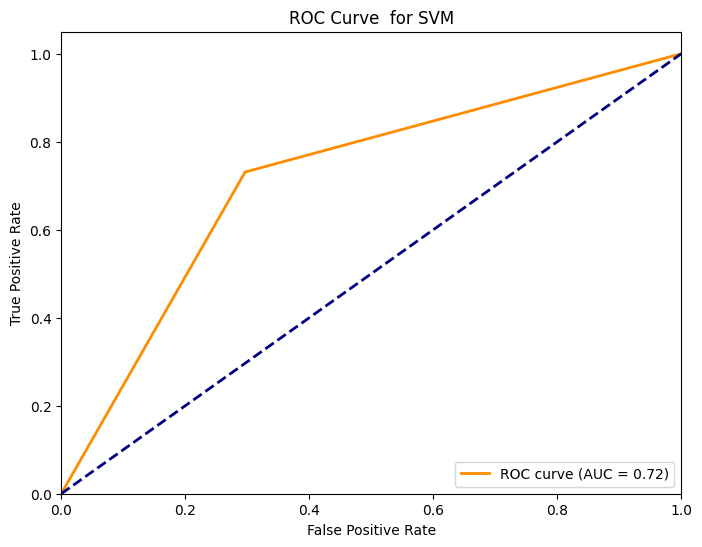

In [25]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, svm_y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve  for SVM')
plt.legend(loc="lower right")
plt.show()


we can observe improved Average precision score of 0.66 and good results from PR curve in comparision to logistic Regression

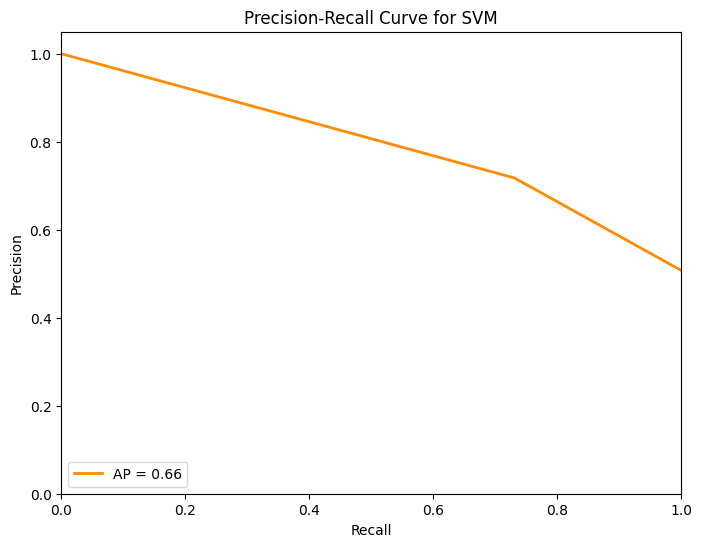

In [26]:
# Calculate Precision-Recall curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, svm_y_pred)
ap = average_precision_score(y_test, svm_y_pred)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='AP = %0.2f' % ap)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend(loc="lower left")
plt.show()

### Random Forest Classifier

Random Forest is an ensemble of decision trees and predictions are made by majority voting across all trees, Thus improving accuracy (Kulkarni and Sinha, 2013).Random forests combine the simplicity of the decision trees with flexibility (Mahmud, Pathan and Quamruzzaman, 2020).In the below code we have craeted a instance from the RandomForestClassifier function and n_estimators sets max no of trees to be constructed to 100 then we have trained the model using our training data 


In [27]:
#Random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Random Forest Evaluation

Looking at accuracy precision of 0.81 , Recall of 0.83 and F1 score of 0.82 this model has performed very good with great results when copared to Logistic regression and SVM used

In [28]:
# Evaluate the model on the test set
rf_y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, pos_label=1)
rf_recall = recall_score(y_test, rf_y_pred, pos_label=1)
rf_f1 = f1_score(y_test, rf_y_pred, pos_label=1)

print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-score: {rf_f1:.2f}")

Accuracy: 0.81
Precision: 0.81
Recall: 0.83
F1-score: 0.82


This good results in Random Forest is again supported by confusion matrix results. Here we can see a great improvement in True Positive and True Negative values which states that the model is predicting correctly on the training set.

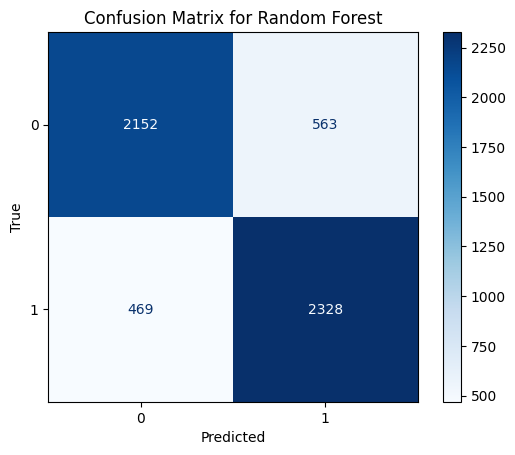

In [29]:
conf_mat = confusion_matrix(y_test, rf_y_pred)
disp = ConfusionMatrixDisplay(conf_mat, display_labels=rf_model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

The improvement in the results is clearly visible in the ROC curve when plotted with AUC value of 0.81 

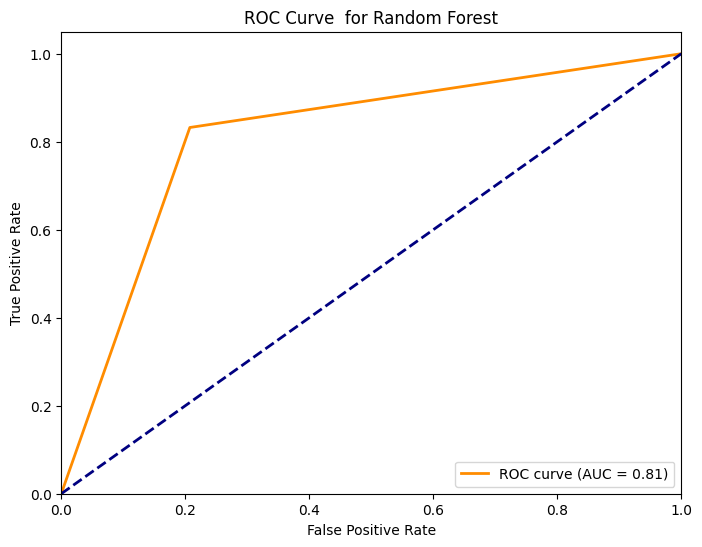

In [30]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, rf_y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve  for Random Forest')
plt.legend(loc="lower right")
plt.show()


PR curve also captures this great results and we can clearly see the improvements in the predictions ,when using this RF model and also we can see our Average precision score of 0.76 which is great

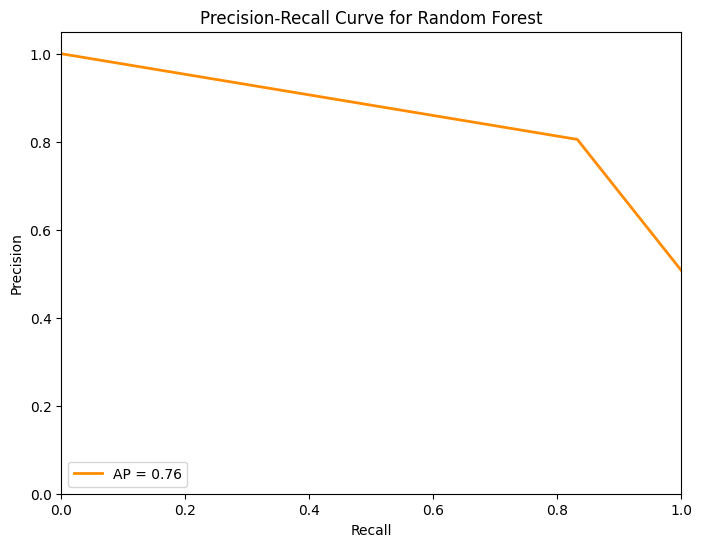

In [31]:
# Calculate Precision-Recall curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, rf_y_pred)
ap = average_precision_score(y_test, rf_y_pred)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='AP = %0.2f' % ap)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc="lower left")
plt.show()

#### Hyperparameter tuning of Random Forest Classifier

Code below perform hyperparameter tuning for a Random Forest classifier using RandomizedSearchCV from scikit-learn. We define a grid of hyperparameters to search over, including the number of trees, maximum features, minimum samples for splitting and leaf nodes, and the splitting criterion. RandomizedSearchCV is then instantiated with the Random Forest estimator and the specified hyperparameter grid. It performs a randomized search over the grid, evaluating the model's performance using cross-validation. After fitting the randomized model, the best hyperparameters are obtained, and a final model is trained using these optimal settings. The code then evaluates the model's performance on the test set. We can observe the model is performing slightly better.

In [32]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

max_features = [ 'log2']
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Creating random grid
random_grid = {'n_estimators': [150,200,250],
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['gini']}
print(random_grid)

{'n_estimators': [150, 200, 250], 'max_features': ['log2'], 'min_samples_split': [2, 5], 'min_samples_leaf': [1], 'criterion': ['gini']}


In [33]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=5,cv=3,verbose=2,
                               random_state=100)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  34.8s
[CV] END criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  33.5s
[CV] END criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  32.8s
[CV] END criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=  43.5s
[CV] END criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=  43.7s
[CV] END criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=  41.6s
[CV] END criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  34.4s
[CV] END criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini'],
                                        'max_features': ['log2'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [150, 200, 250]},
                   random_state=100, verbose=2)

In [34]:
rf_randomcv.best_params_

{'n_estimators': 250,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'criterion': 'gini'}

In [35]:
best_random_grid=rf_randomcv.best_estimator_

#### Hyperparameter Tuned Random Forest Evaluation

In [36]:
# Evaluate the model on the test set
bestrf_y_pred = best_random_grid.predict(X_test)

rf_accuracy = accuracy_score(y_test, bestrf_y_pred)
rf_precision = precision_score(y_test, bestrf_y_pred, pos_label=1)
rf_recall = recall_score(y_test, bestrf_y_pred, pos_label=1)
rf_f1 = f1_score(y_test, bestrf_y_pred, pos_label=1)

print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-score: {rf_f1:.2f}")

Accuracy: 0.81
Precision: 0.79
Recall: 0.85
F1-score: 0.82


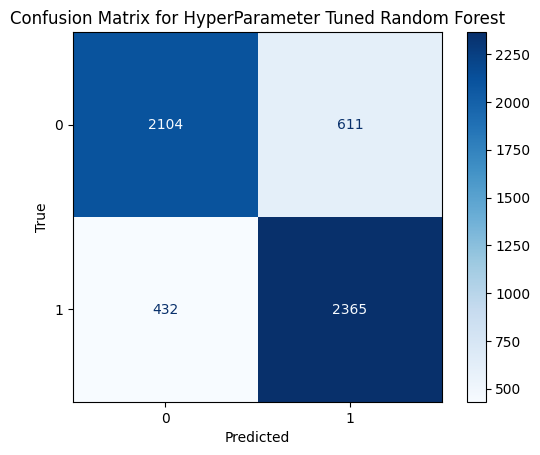

In [37]:
conf_mat = confusion_matrix(y_test, bestrf_y_pred)
disp = ConfusionMatrixDisplay(conf_mat, display_labels=rf_model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for HyperParameter Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

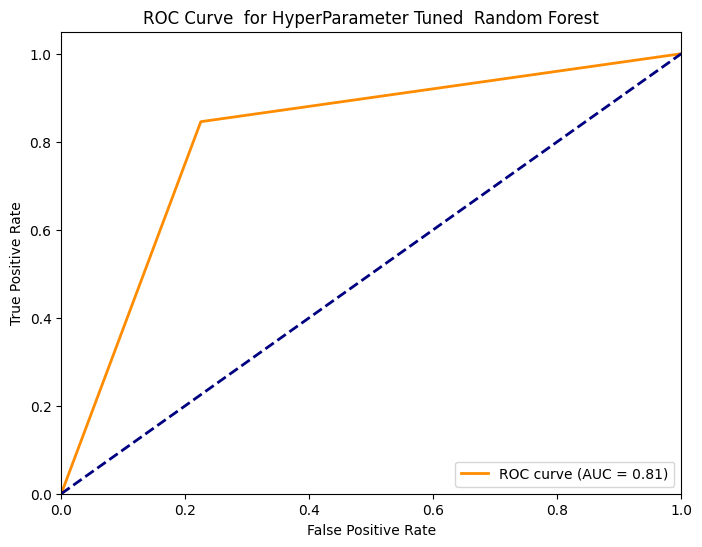

In [38]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, bestrf_y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve  for HyperParameter Tuned  Random Forest')
plt.legend(loc="lower right")
plt.show()


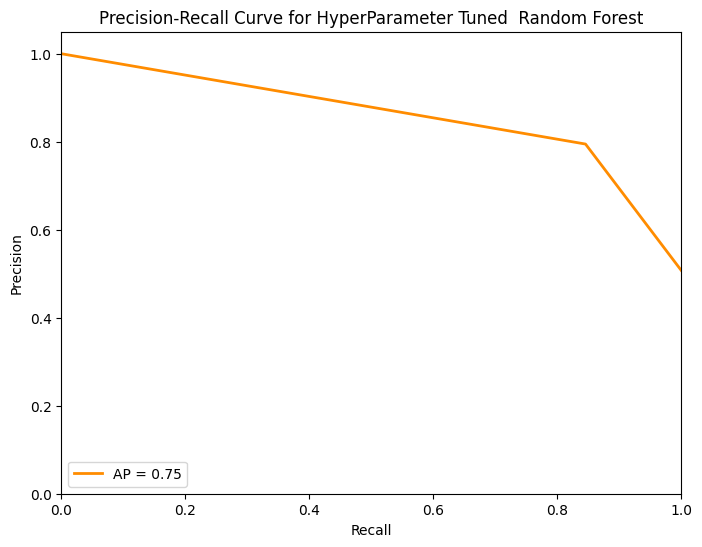

In [39]:
# Calculate Precision-Recall curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, bestrf_y_pred)
ap = average_precision_score(y_test, bestrf_y_pred)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='AP = %0.2f' % ap)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for HyperParameter Tuned  Random Forest')
plt.legend(loc="lower left")
plt.show()

## Deep Learning Models

### Convolutional Neural Network 

In [40]:
# Reshape the input data to a 4D array for CNN
X_train = X_train.reshape(X_train.shape[0], 64, 64,1)
X_test = X_test.reshape(X_test.shape[0], 64, 64,1)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [42]:
maleria_cnn = model1.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
689/689 [==============================] - 12s 9ms/step - loss: 0.6383 - accuracy: 0.6248 - val_loss: 0.5205 - val_accuracy: 0.7464
Epoch 2/15
689/689 [==============================] - 6s 8ms/step - loss: 0.3344 - accuracy: 0.8608 - val_loss: 0.2155 - val_accuracy: 0.9165
Epoch 3/15
689/689 [==============================] - 6s 8ms/step - loss: 0.1752 - accuracy: 0.9370 - val_loss: 0.1740 - val_accuracy: 0.9352
Epoch 4/15
689/689 [==============================] - 6s 8ms/step - loss: 0.1413 - accuracy: 0.9496 - val_loss: 0.1603 - val_accuracy: 0.9419
Epoch 5/15
689/689 [==============================] - 6s 8ms/step - loss: 0.1164 - accuracy: 0.9580 - val_loss: 0.1623 - val_accuracy: 0.9432
Epoch 6/15
689/689 [==============================] - 6s 8ms/step - loss: 0.0974 - accuracy: 0.9644 - val_loss: 0.1982 - val_accuracy: 0.9331
Epoch 7/15
689/689 [==============================] - 6s 8ms/step - loss: 0.0745 - accuracy: 0.9745 - val_loss: 0.1984 - val_accuracy: 0.9419
Epoch

#### CNN Evaluation

Now we make predictions on test set and can see accuracy, recall of 0.93 precision of 0.95 and F1 score of 0.94 these are by far the best results obtained from any model and this is supported by the confusion matrix plotted as well where it is classifying most of the images correctly and through ROC , PR curve we can visually see this great results obtained with AUC 0.94 and Average Precision of 0.92 this classification model is showing great results as compared to all of the Machine Learning Models used. 

In [43]:
# Evaluate the model on the test set
CNN_y_pred = (model1.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, CNN_y_pred)
precision = precision_score(y_test, CNN_y_pred)
recall = recall_score(y_test, CNN_y_pred)
f1 = f1_score(y_test, CNN_y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

173/173 [==============================] - 0s 2ms/step
Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F1-score: 0.94


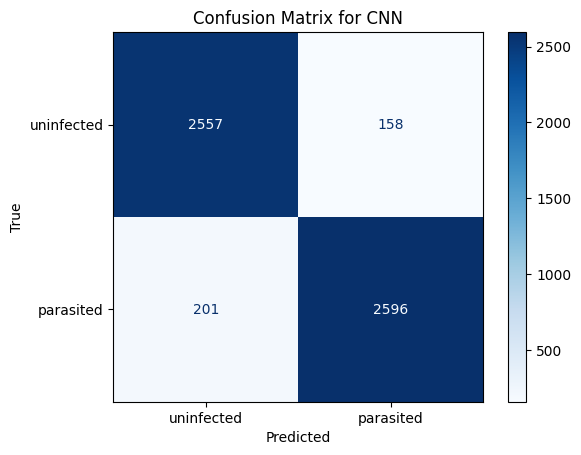

In [44]:
conf_mat = confusion_matrix(y_test, CNN_y_pred)
disp = ConfusionMatrixDisplay(conf_mat, display_labels=['uninfected','parasited'])

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for CNN')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

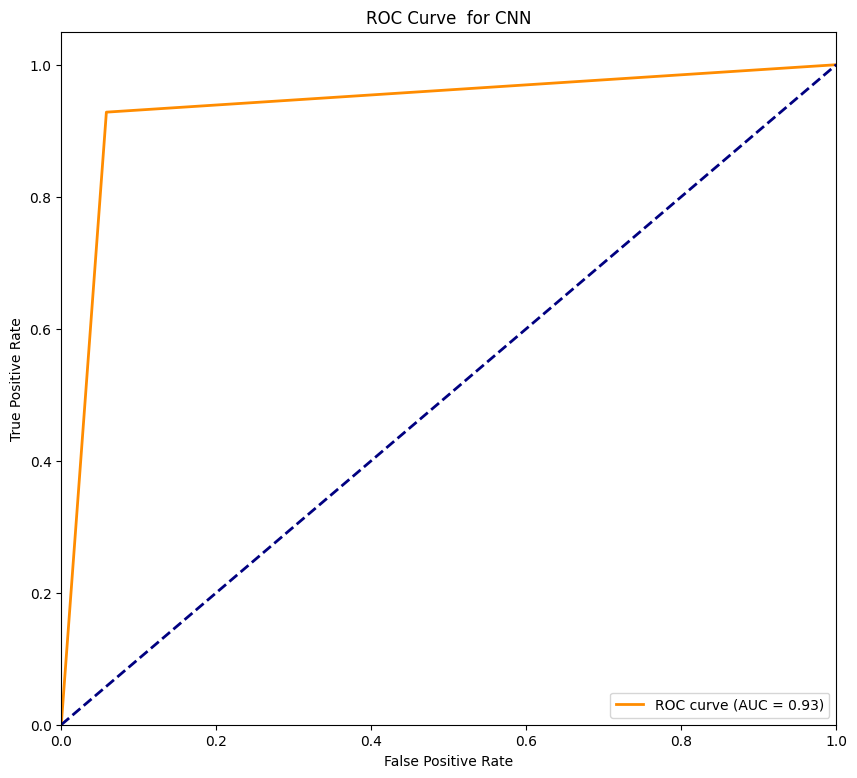

In [45]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, CNN_y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 9))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve  for CNN')
plt.legend(loc="lower right")
plt.show()


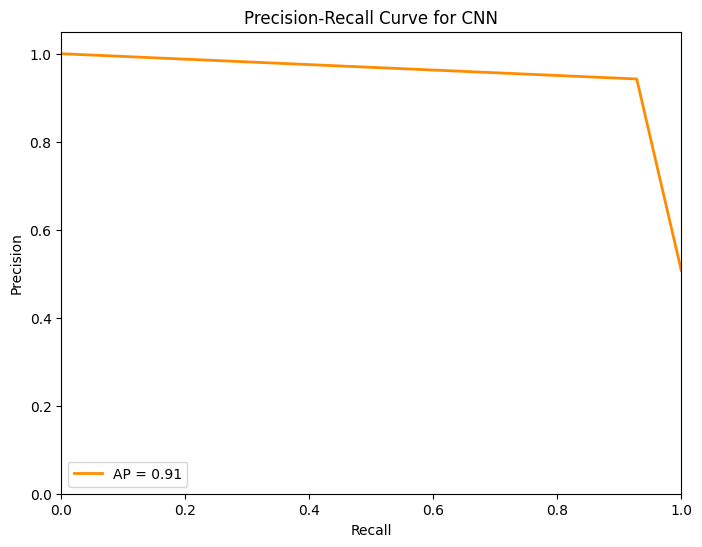

In [46]:
# Calculate Precision-Recall curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, CNN_y_pred)
ap = average_precision_score(y_test, CNN_y_pred)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='AP = %0.2f' % ap)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for CNN')
plt.legend(loc="lower left")
plt.show()

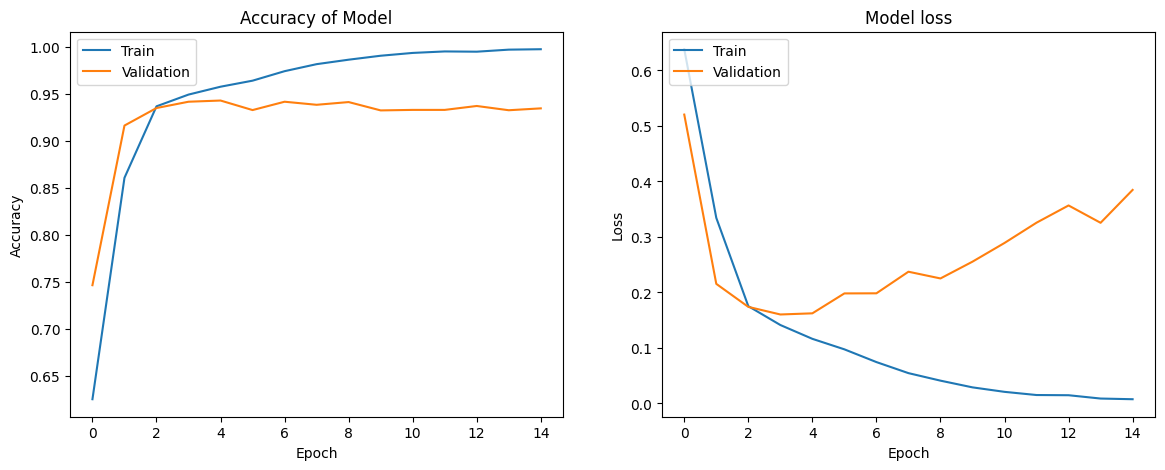

In [47]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(maleria_cnn.history['accuracy'])
plt.plot(maleria_cnn.history['val_accuracy'])
plt.title('Accuracy of Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize of model loss
plt.subplot(1, 2, 2)
plt.plot(maleria_cnn.history['loss'])
plt.plot(maleria_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#### Hyperparameter Tuning CNN

Inside build_model function the CNN architecture, including configurable hyperparameters such as the number of filters in convolutional layers, the number of dense layers, and the learning rate is defined here we have used 3 Convolutional,Maxpool and Dense layers. Inside this function the BayesianOptimization tuner is used, with the objective set to validation accuracy. This tuner searches the defined hyperparameter space while training and assessing many models with various hyperparameter combinations. Early stopping is utilized to prevent overfitting. Following the search, the best hyperparameters are identified and the best model is trained on the entire dataset. The best model's architecture and weights are saved, and its performance is assessed on the test set. The results show some amount of Improvement and is supported by Confusion Matrix , ROC Curve , PR Curve results below . This tuning process helps find the optimal hyperparameters for the CNN, leading to improved performance as we can see.

In [48]:
# function to build the model
def build_model(hp):
    model = Sequential()
    
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', min_value=16, max_value=128, step=8),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(64, 64, 1)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', min_value=32, max_value=256, step=32),
        kernel_size=(3, 3),
        activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv_3_filters', min_value=32, max_value=256, step=32),
        kernel_size=(3, 3),
        activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_1_units', min_value=8, max_value=32, step=8),
        activation='relu'))
    model.add(Dense(
        units=hp.Int('dense_2_units', min_value=8, max_value=64, step=8),
        activation='relu'))
    
    
    model.add(Dense(1, activation='sigmoid'))

    # Compiling model
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                 loss='binary_crossentropy', metrics=['accuracy'])

    return model

# tuner with Bayesian Optimization
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=30, 
    executions_per_trial=2, 
    directory='my_dir',
    project_name='malaria_detection1'
)


tuner.search(X_train, y_train, validation_data=(X_test, y_test), callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

#  best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build  best model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hyperparameters)

# Training the best model 
maleria1_cnn=best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Saving the whole best model 
best_model.save('best_model.h5')

best_model_architecture = tf.keras.models.load_model('best_model.h5')

#  summary of the best model
best_model_architecture.summary()


Reloading Tuner from my_dir\malaria_detection1\tuner0.json
Epoch 1/30
689/689 [==============================] - 6s 8ms/step - loss: 0.5442 - accuracy: 0.6713 - val_loss: 0.2474 - val_accuracy: 0.8980
Epoch 2/30
689/689 [==============================] - 5s 8ms/step - loss: 0.1739 - accuracy: 0.9343 - val_loss: 0.1593 - val_accuracy: 0.9459
Epoch 3/30
689/689 [==============================] - 5s 7ms/step - loss: 0.1443 - accuracy: 0.9481 - val_loss: 0.1543 - val_accuracy: 0.9470
Epoch 4/30
689/689 [==============================] - 5s 7ms/step - loss: 0.1328 - accuracy: 0.9526 - val_loss: 0.1487 - val_accuracy: 0.9481
Epoch 5/30
689/689 [==============================] - 5s 7ms/step - loss: 0.1253 - accuracy: 0.9550 - val_loss: 0.1428 - val_accuracy: 0.9494
Epoch 6/30
689/689 [==============================] - 5s 8ms/step - loss: 0.1167 - accuracy: 0.9580 - val_loss: 0.1463 - val_accuracy: 0.9459
Epoch 7/30
689/689 [==============================] - 5s 8ms/step - loss: 0.1073 - accura

#### Hyperparameter Tuned CNN Evaluation

In [49]:
# Evaluate the model on the test set
bestCNN_y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, bestCNN_y_pred)
precision = precision_score(y_test, bestCNN_y_pred)
recall = recall_score(y_test, bestCNN_y_pred)
f1 = f1_score(y_test, bestCNN_y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

173/173 [==============================] - 1s 2ms/step
Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1-score: 0.94


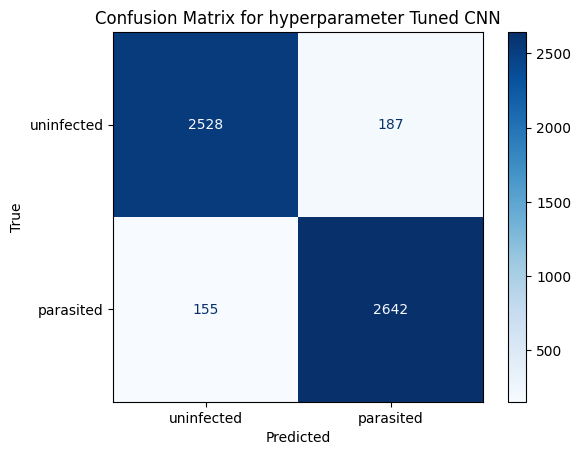

In [50]:
conf_mat = confusion_matrix(y_test, bestCNN_y_pred)
disp = ConfusionMatrixDisplay(conf_mat, display_labels=['uninfected','parasited'])

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for hyperparameter Tuned CNN')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

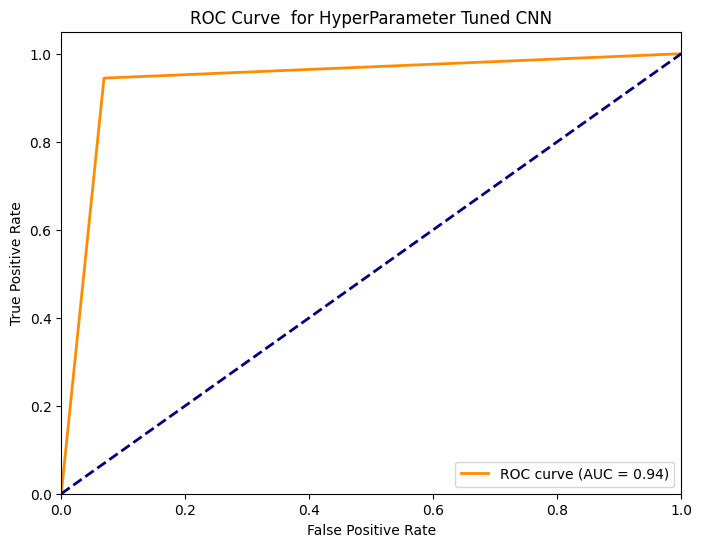

In [51]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, bestCNN_y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve  for HyperParameter Tuned CNN')
plt.legend(loc="lower right")
plt.show()


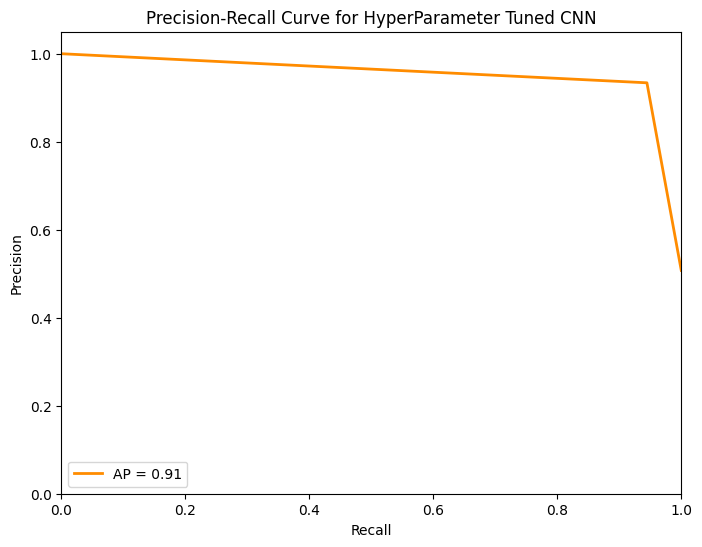

In [52]:
# Calculate Precision-Recall curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, bestCNN_y_pred)
ap = average_precision_score(y_test, bestCNN_y_pred)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='AP = %0.2f' % ap)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for HyperParameter Tuned CNN')
plt.legend(loc="lower left")
plt.show()

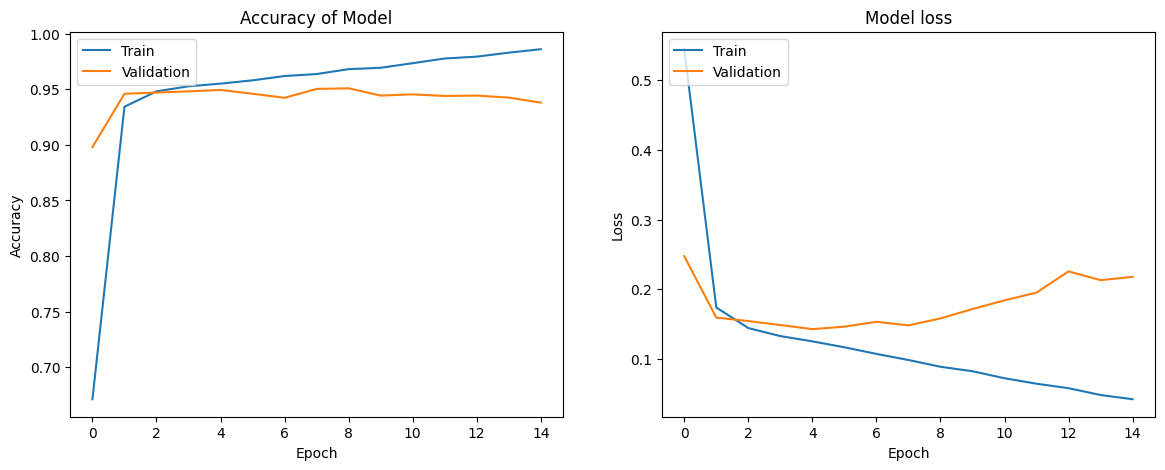

In [53]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(maleria1_cnn.history['accuracy'])
plt.plot(maleria1_cnn.history['val_accuracy'])
plt.title('Accuracy of Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize of model loss
plt.subplot(1, 2, 2)
plt.plot(maleria1_cnn.history['loss'])
plt.plot(maleria1_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Recurrent Neural Network

Recurrent neural networks is a type of Neural network which can use internal memory to process incoming data. It works by calculating the current network state using the prior one. A recurrent network is defined as several copies of the same network, each of which sends information to the next copy (Brokarev, Farkhadov and Vaskovskii, 2021).

In [54]:
# Reshape the input data to a 3D array for RNN
X_train = X_train.reshape(X_train.shape[0], 64, 64)
X_test = X_test.reshape(X_test.shape[0],64, 64)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

model4 = Sequential()
model4.add(SimpleRNN(64, return_sequences=True, input_shape=( 64,64)))
model4.add(Dropout(0.2))
model4.add(SimpleRNN(128, return_sequences=False))
model4.add(Dropout(0.2))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [56]:
maleria_rnn = model4.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
689/689 [==============================] - 111s 159ms/step - loss: 0.6912 - accuracy: 0.5444 - val_loss: 0.6740 - val_accuracy: 0.5922
Epoch 2/25
689/689 [==============================] - 110s 160ms/step - loss: 0.6847 - accuracy: 0.5550 - val_loss: 0.6928 - val_accuracy: 0.5076
Epoch 3/25
689/689 [==============================] - 113s 165ms/step - loss: 0.6760 - accuracy: 0.5767 - val_loss: 0.6760 - val_accuracy: 0.5889
Epoch 4/25
689/689 [==============================] - 113s 164ms/step - loss: 0.6731 - accuracy: 0.5853 - val_loss: 0.6601 - val_accuracy: 0.6114
Epoch 5/25
689/689 [==============================] - 114s 165ms/step - loss: 0.6642 - accuracy: 0.6022 - val_loss: 0.6681 - val_accuracy: 0.5918
Epoch 6/25
689/689 [==============================] - 112s 162ms/step - loss: 0.6604 - accuracy: 0.6153 - val_loss: 0.6662 - val_accuracy: 0.5844
Epoch 7/25
689/689 [==============================] - 113s 164ms/step - loss: 0.6551 - accuracy: 0.6207 - val_loss: 0.6536 -

#### RNN Evaluation

In [57]:
# Evaluate the model on the test set
RNN_y_pred = (model4.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, RNN_y_pred)
precision = precision_score(y_test, RNN_y_pred)
recall = recall_score(y_test, RNN_y_pred)
f1 = f1_score(y_test, RNN_y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

173/173 [==============================] - 4s 21ms/step
Accuracy: 0.64
Precision: 0.68
Recall: 0.55
F1-score: 0.60


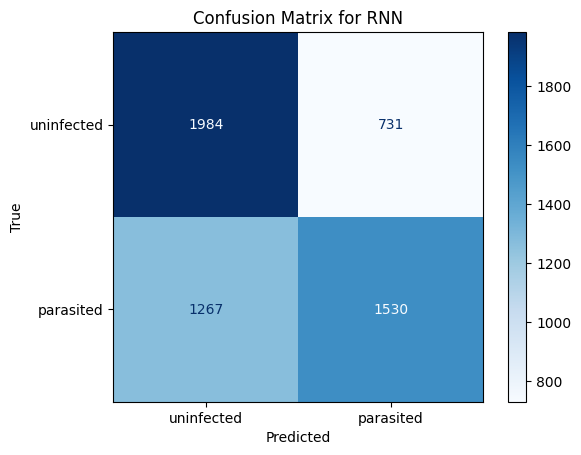

In [58]:
conf_mat = confusion_matrix(y_test, RNN_y_pred)
disp = ConfusionMatrixDisplay(conf_mat, display_labels=['uninfected','parasited'])

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for RNN')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

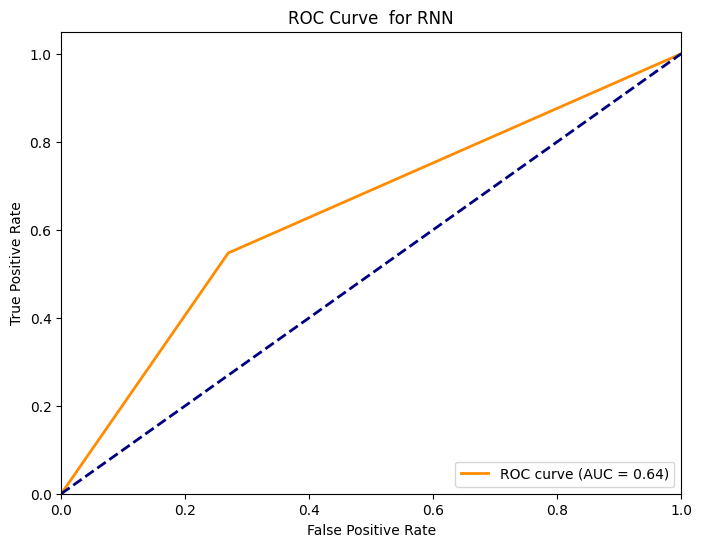

In [59]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, RNN_y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve  for RNN')
plt.legend(loc="lower right")
plt.show()


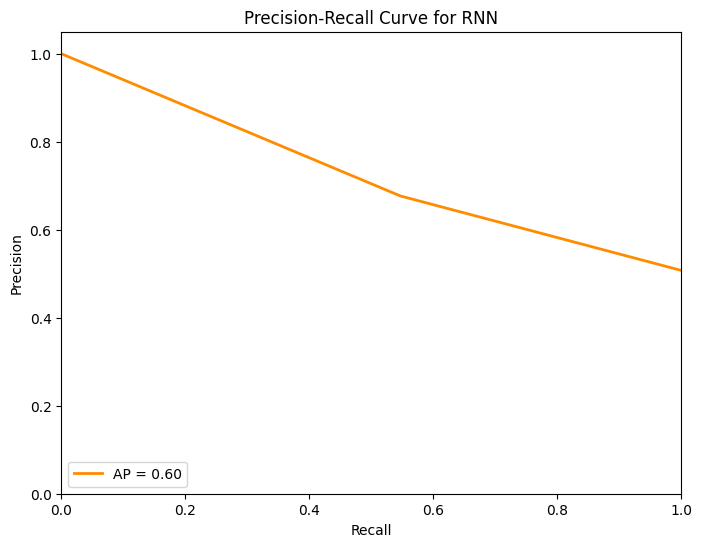

In [60]:
# Calculate Precision-Recall curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, RNN_y_pred)
ap = average_precision_score(y_test, RNN_y_pred)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='AP = %0.2f' % ap)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for RNN')
plt.legend(loc="lower left")
plt.show()

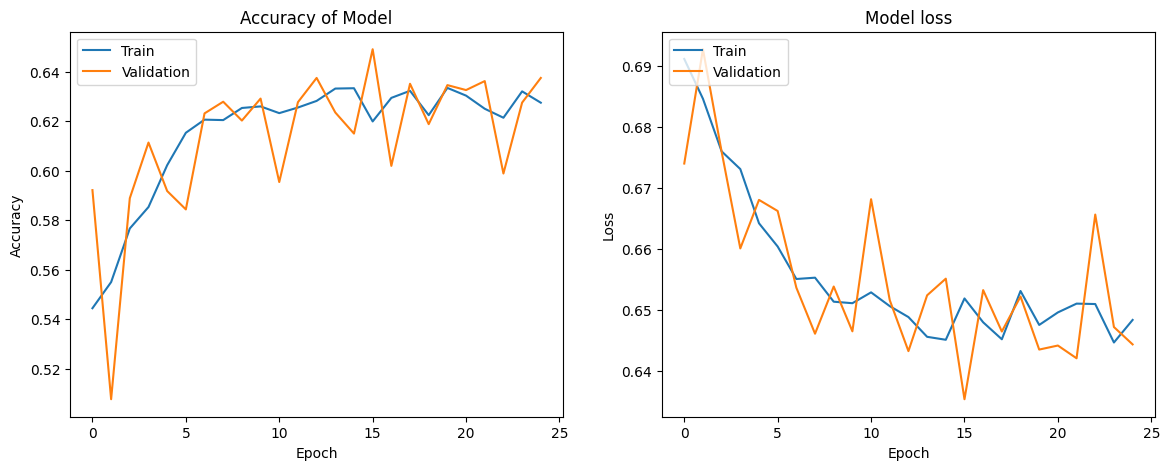

In [61]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(maleria_rnn.history['accuracy'])
plt.plot(maleria_rnn.history['val_accuracy'])
plt.title('Accuracy of Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize of model loss
plt.subplot(1, 2, 2)
plt.plot(maleria_rnn.history['loss'])
plt.plot(maleria_rnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#### Long Short Term Memory Model

LSTM is an advanced version of RNN model, it is great in handling long sequences by handling the vanishing gradient issue. It uses input, forget, and output gates to manage information flow. It preserves relevant details over extended periods. This capability makes LSTM particularly suitable for complex tasks (Ren, Xu and Yu, 2021).

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model3 = Sequential()
model3.add(LSTM(64,  return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(128, return_sequences=False))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [63]:
maleria_lstm = model3.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
689/689 [==============================] - 20s 22ms/step - loss: 0.6783 - accuracy: 0.5665 - val_loss: 0.6482 - val_accuracy: 0.6210
Epoch 2/25
689/689 [==============================] - 15s 21ms/step - loss: 0.6493 - accuracy: 0.6211 - val_loss: 0.6266 - val_accuracy: 0.6584
Epoch 3/25
689/689 [==============================] - 15s 21ms/step - loss: 0.6263 - accuracy: 0.6477 - val_loss: 0.6090 - val_accuracy: 0.6733
Epoch 4/25
689/689 [==============================] - 15s 21ms/step - loss: 0.6125 - accuracy: 0.6646 - val_loss: 0.6030 - val_accuracy: 0.6687
Epoch 5/25
689/689 [==============================] - 15s 21ms/step - loss: 0.6006 - accuracy: 0.6794 - val_loss: 0.5819 - val_accuracy: 0.6925
Epoch 6/25
689/689 [==============================] - 15s 21ms/step - loss: 0.5861 - accuracy: 0.6923 - val_loss: 0.5856 - val_accuracy: 0.6778
Epoch 7/25
689/689 [==============================] - 14s 21ms/step - loss: 0.5708 - accuracy: 0.7023 - val_loss: 0.5716 - val_accuracy:

#### LSTM Evaluation

In [64]:
# Evaluate the model on the test set
LSTM_y_pred = (model3.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, LSTM_y_pred)
precision = precision_score(y_test, LSTM_y_pred)
recall = recall_score(y_test, LSTM_y_pred)
f1 = f1_score(y_test, LSTM_y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

173/173 [==============================] - 2s 8ms/step
Accuracy: 0.89
Precision: 0.91
Recall: 0.88
F1-score: 0.90


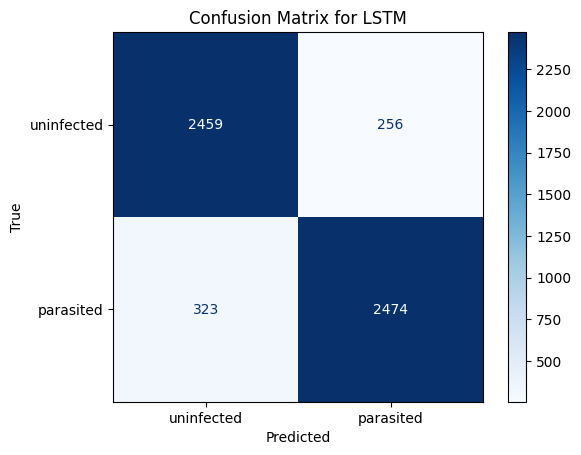

In [65]:
conf_mat = confusion_matrix(y_test, LSTM_y_pred)
disp = ConfusionMatrixDisplay(conf_mat, display_labels=['uninfected','parasited'])

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for LSTM')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

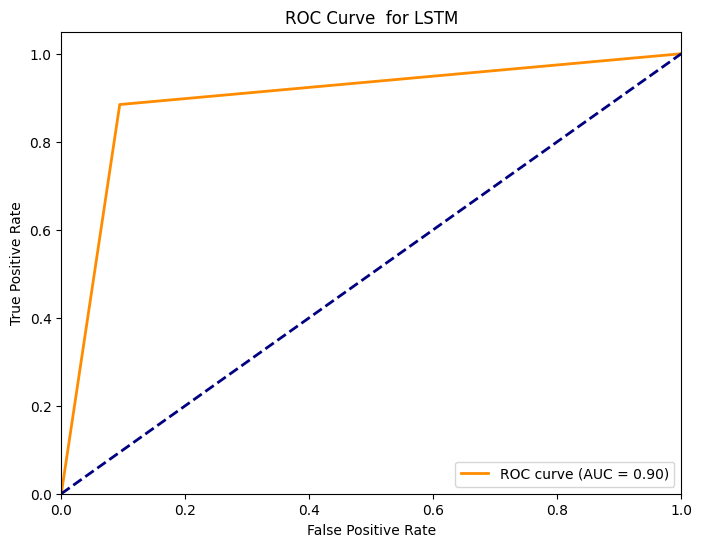

In [66]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, LSTM_y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve  for LSTM')
plt.legend(loc="lower right")
plt.show()


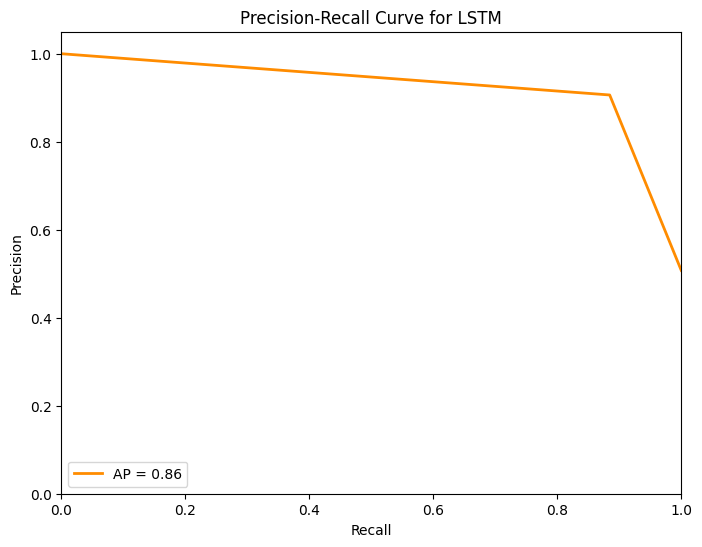

In [67]:
# Calculate Precision-Recall curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, LSTM_y_pred)
ap = average_precision_score(y_test, LSTM_y_pred)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='AP = %0.2f' % ap)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LSTM')
plt.legend(loc="lower left")
plt.show()

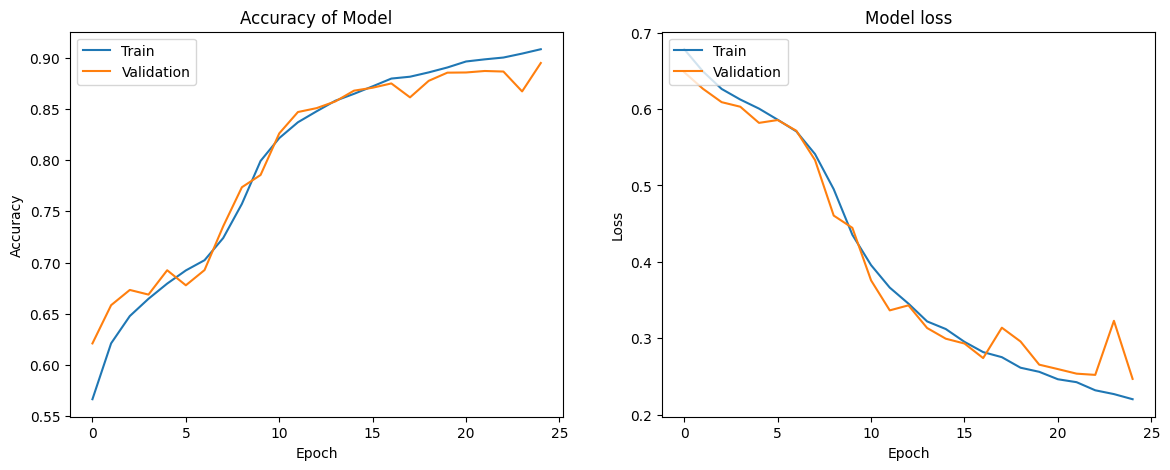

In [68]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(maleria_lstm.history['accuracy'])
plt.plot(maleria_lstm.history['val_accuracy'])
plt.title('Accuracy of Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize of model loss
plt.subplot(1, 2, 2)
plt.plot(maleria_lstm.history['loss'])
plt.plot(maleria_lstm.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Conclusion and Results Analysis

## References

1.	World Health Organization(2023) ‘Malaria', Home/Newsroom/Fact sheets/Detail/Malaria. Available at: https://www.who.int/news-room/fact-sheets/detail/malaria (Accessed: [15 May 2024]).
2.	Cadik, M., 2008. Perceptual evaluation of color-to-grayscale image conversions. In: Computer Graphics Forum, vol. 27. Wiley Online Library, pp. 1745–1754.
3.	Benedetti, L., Corsini, M., Cignoni, P., Callieri, M., Scopigno, R., 2012. Color to gray conversions in the context of stereo matching algorithms: an analysis and comparison of current methods and an ad-hoc theoretically-motivated technique for image matching. Machine Vision and Applications, 23, pp. 327–348.
4.	Fairchild, M.D., 2013. Color Appearance Models. Wiley, New York.

5.	Cokluk, O., 2010. Logistic Regression: Concept and Application. Educational Sciences: Theory and Practice, 10(3), pp.1397-1407.
6.	Qi, X. and Wen, S. (2017) 'An iterative projection method for generalized support vector machine', in 2017 International Conference on Advanced Mechatronic Systems (ICAMechS). Xiamen, China, pp. 392-397. doi: 10.1109/ICAMechS.2017.8316505.

7.	Mahmud, F., Pathan, N.S. and Quamruzzaman, M. (2020) 'Early detection of Sepsis in critical patients using Random Forest Classifier', 2020 IEEE Region 10 Symposium (TENSYMP), Dhaka, Bangladesh, pp. 130-133. doi: 10.1109/TENSYMP50017.2020.9231011.
8.	Kulkarni, V.Y. and Sinha, P.K., 2013. Random forest classifiers: a survey and future research directions. Int. J. Adv. Comput, 36(1), pp.1144-1153.
9.	Albawi, S., Mohammed, T.A. and Al-Zawi, S., 2017. Understanding of a convolutional neural network. 2017 International Conference on Engineering and Technology (ICET), Antalya, Turkey, pp.1-6. doi: 10.1109/ICEngTechnol.2017.8308186.
10.	Brokarev, I.A., Farkhadov, M.P. and Vaskovskii, S.V., 2021. Natural Gas Quality Analysis by Recurrent Neural Networks. 2021 IEEE 15th International Conference on Application of Information and Communication Technologies (AICT), Baku, Azerbaijan, pp.1-4. doi: 10.1109/AICT52784.2021.9620388.
11.	Ren, B., Xu, X. and Yu, H., 2021. Research of LSTM-RNN Model and Its Application Evaluation on Agricultural Products Circulation. 2021 IEEE 3rd Eurasia Conference on IOT, Communication and Engineering (ECICE), Yunlin, Taiwan, pp.467-471. doi: 10.1109/ECICE52819.2021.9645687.
